# Exploratory Data Analysis

## Import libraries and Loading Data

In [25]:
# TODO: Download data in the notebook
# TODO: Check if use the correct charts for the exploration

In [25]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # Grid creation
import seaborn as sns
%matplotlib inline

# plt.rcParams["figure.figsize"] = (8, 6)
sns.set_palette("pastel")

In [50]:
DATA_DIR = "data"

# Load the data to explore
df = pd.read_csv(f"{DATA_DIR}/train.csv")

## Information and Description

This is a medium/big dataset with almost 700K rows and 17 columns.

Almost all columns are categorical variables distributed between binomial and nominal variables. Also, the variable `FAMI_ESTRATOVIVIENDA`
is an ordinal variable describing social classes.

There is also a few columns with missing values, but it's not a big problem since they don't represent a big part of the dataset. So both dropping or imputation strategies could be considered when preprocessing the data.

There is also a duplicated column in the dataset, so dropping it is most likely what is going to be done when preprocessing the data.

In [51]:
df.head().T

,0,1,2,3,4
ID,904256,645256,308367,470353,989032
PERIODO,20212,20212,20203,20195,20212
ESTU_PRGM_ACADEMICO,ENFERMERIA,DERECHO,MERCADEO Y PUBLICIDAD,ADMINISTRACION DE EMPRESAS,PSICOLOGIA
ESTU_PRGM_DEPARTAMENTO,BOGOTÁ,ATLANTICO,BOGOTÁ,SANTANDER,ANTIOQUIA
ESTU_VALORMATRICULAUNIVERSIDAD,Entre 5.5 millones y menos de 7 millones,Entre 2.5 millones y menos de 4 millones,Entre 2.5 millones y menos de 4 millones,Entre 4 millones y menos de 5.5 millones,Entre 2.5 millones y menos de 4 millones
ESTU_HORASSEMANATRABAJA,Menos de 10 horas,0,Más de 30 horas,0,Entre 21 y 30 horas
FAMI_ESTRATOVIVIENDA,Estrato 3,Estrato 3,Estrato 3,Estrato 4,Estrato 3
FAMI_TIENEINTERNET,Si,No,Si,Si,Si
FAMI_EDUCACIONPADRE,Técnica o tecnológica incompleta,Técnica o tecnológica completa,Secundaria (Bachillerato) completa,No sabe,Primaria completa
FAMI_TIENELAVADORA,Si,Si,Si,Si,Si


In [28]:
# Show the dimensions of our dataset
df.shape

(692500, 17)

In [29]:
# Explore data types and number of rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_TIENELAVADORA              652727 non-null  object
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object
 12  ESTU_PAGOMATRICULAPROPIO      

In [30]:
# Categorial columns description
df.describe(include=["object"]).T

,count,unique,top,freq
ESTU_PRGM_ACADEMICO,692500,948,DERECHO,53244
ESTU_PRGM_DEPARTAMENTO,692500,31,BOGOTÁ,282159
ESTU_VALORMATRICULAUNIVERSIDAD,686213,8,Entre 1 millón y menos de 2.5 millones,204048
ESTU_HORASSEMANATRABAJA,661643,5,Más de 30 horas,249352
FAMI_ESTRATOVIVIENDA,660363,7,Estrato 2,232671
FAMI_TIENEINTERNET,665871,2,Si,592514
FAMI_EDUCACIONPADRE,669322,12,Secundaria (Bachillerato) completa,128289
FAMI_TIENELAVADORA,652727,2,Si,563390
FAMI_TIENEAUTOMOVIL,648877,2,No,412606
ESTU_PRIVADO_LIBERTAD,692500,2,N,692466


### Missing Values and Duplicates

In [31]:
# Null values
df.isnull().sum().sort_values(ascending=False)

FAMI_TIENEAUTOMOVIL               43623
FAMI_TIENELAVADORA                39773
FAMI_TIENECOMPUTADOR              38103
FAMI_ESTRATOVIVIENDA              32137
ESTU_HORASSEMANATRABAJA           30857
FAMI_TIENEINTERNET.1              26629
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONMADRE               23664
FAMI_EDUCACIONPADRE               23178
ESTU_PAGOMATRICULAPROPIO           6498
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ID                                    0
ESTU_PRIVADO_LIBERTAD                 0
PERIODO                               0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_PRGM_ACADEMICO                   0
RENDIMIENTO_GLOBAL                    0
dtype: int64

In [32]:
# Look for duplicated rows
df.duplicated().value_counts()

False    692500
Name: count, dtype: int64

In [33]:
# Look for duplicate rows in similar features
df[["FAMI_TIENEINTERNET", "FAMI_TIENEINTERNET.1"]].duplicated().value_counts()

True     692497
False         3
Name: count, dtype: int64

## Variables Distributions

- Target classes are balance, which is good when considering some models.
- Almost all binominal variables are unbalanced. But some might bring useful information when they interact with other.
- There are variables with high-cardinality, they need some preprocessing and normalizacion. Feature engineering could also be considered for these variables.

### Target Variable

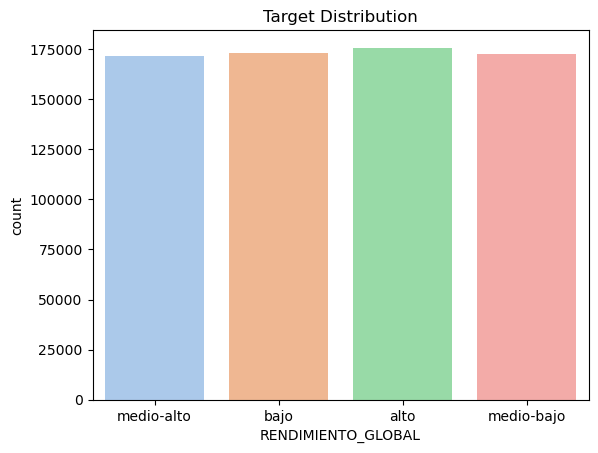

In [34]:
# Visualize target distribution
ax = sns.countplot(x="RENDIMIENTO_GLOBAL", data=df, hue="RENDIMIENTO_GLOBAL")
ax.set_title("Target Distribution")
plt.show()

### Binomial Variables

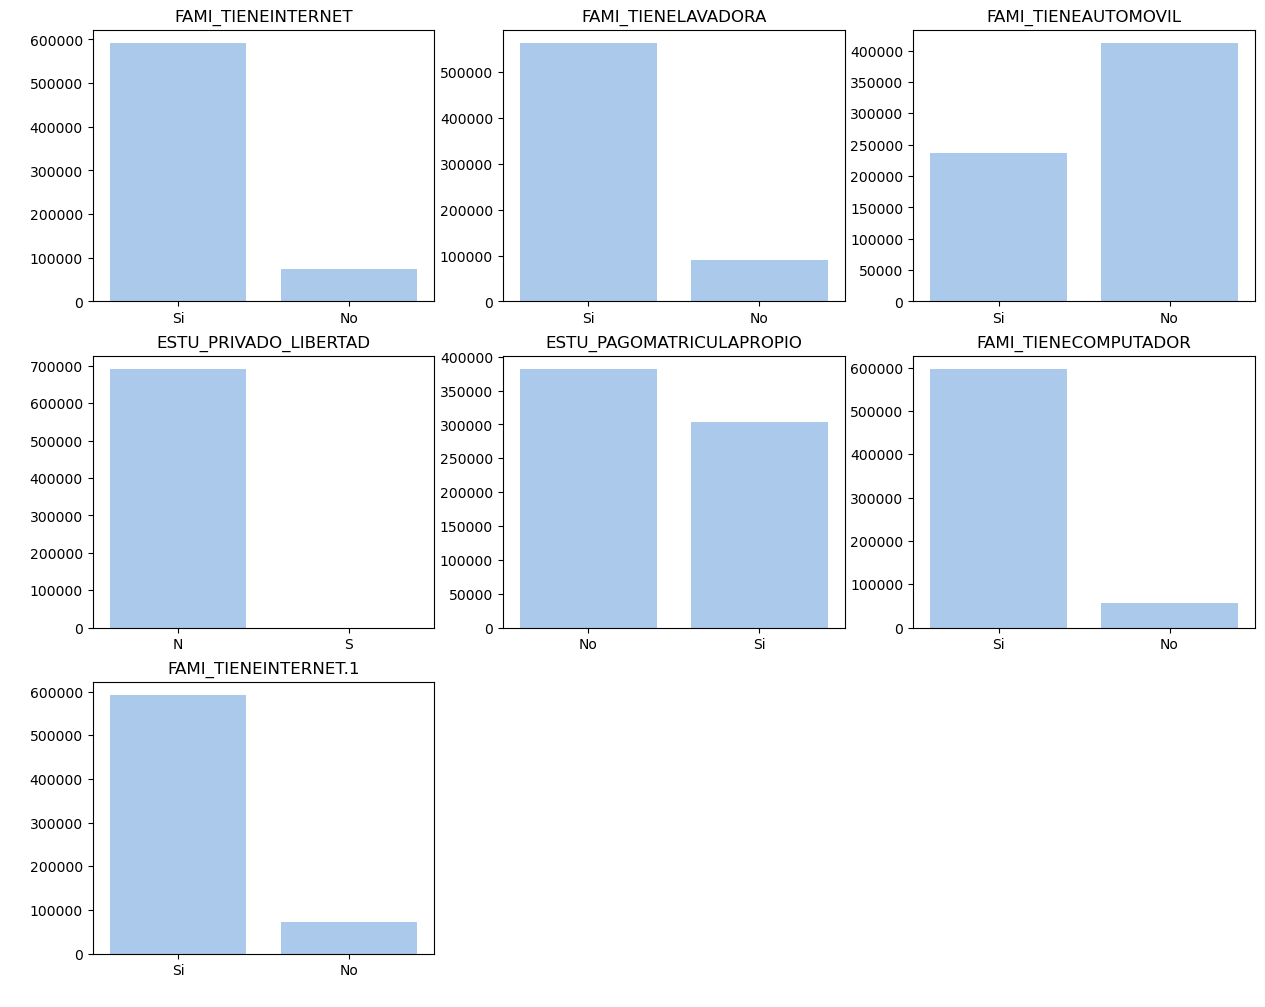

In [35]:
# Get binary variables
unique_values_count = df.nunique()
bin_cols = [cname for cname in unique_values_count.index if unique_values_count[cname] <= 2]

# Show distribution for each binary variable
plt.figure(figsize=(15, 12))
grid = gridspec.GridSpec(3, 3) # Create a grid for subplots

for idx, col in enumerate(bin_cols):
    ax = plt.subplot(grid[idx])
    sns.countplot(x=col, data=df)
    ax.set_xlabel(" ") # Delete xlabel
    ax.set_ylabel(" ")
    ax.set_title(f"{col}")

plt.show()

### Nominal Variables

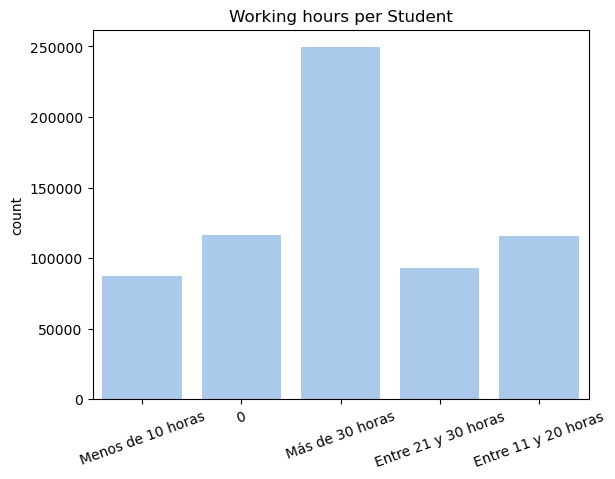

In [36]:
sns.countplot(data=df, x="ESTU_HORASSEMANATRABAJA")
plt.title("Working hours per Student")
plt.xlabel("")
plt.xticks(rotation=20)
plt.show()

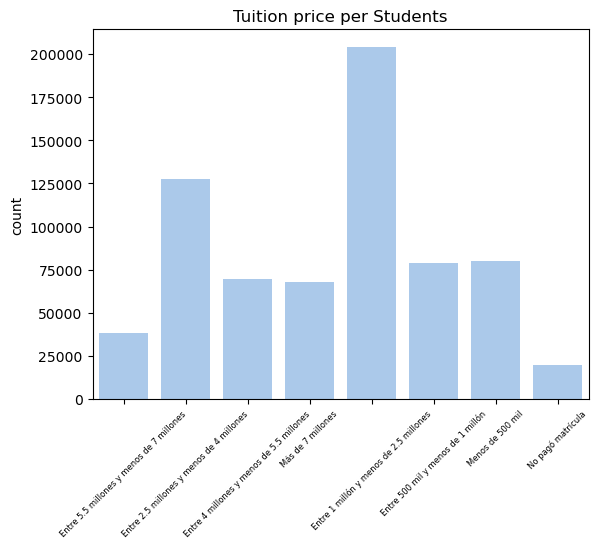

In [37]:
sns.countplot(data=df, x="ESTU_VALORMATRICULAUNIVERSIDAD")
plt.title("Tuition price per Students")
plt.xlabel("")
plt.xticks(rotation=45, fontsize=6)
plt.show()

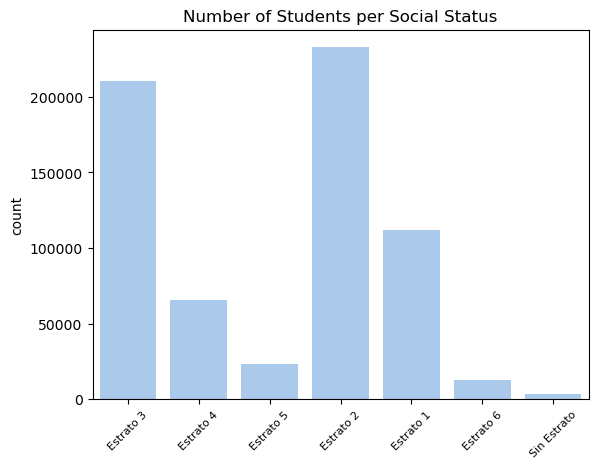

In [38]:
sns.countplot(data=df, x="FAMI_ESTRATOVIVIENDA")
plt.title("Number of Students per Social Status")
plt.xlabel("")
plt.xticks(rotation=45, fontsize=8)
plt.show()

### High-Cardinality Variables

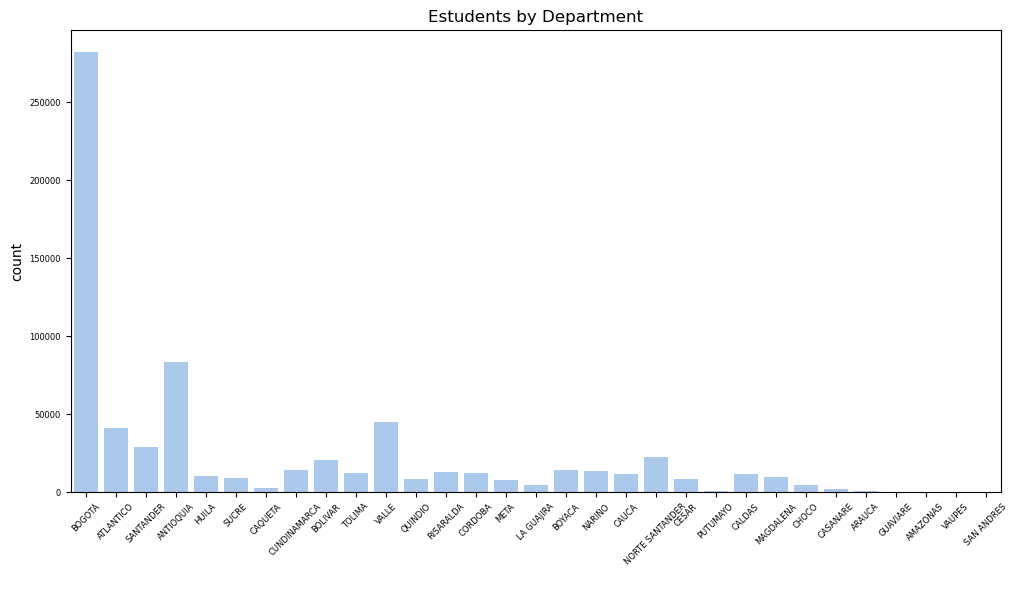

In [39]:
# Show distribution for high-cardinality variables
# (more than 15 unique variables)
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x="ESTU_PRGM_DEPARTAMENTO")
ax.set_title("Estudents by Department")
ax.set_xlabel(" ")
plt.xticks(rotation=45)
plt.tick_params(labelsize=6)
plt.show()

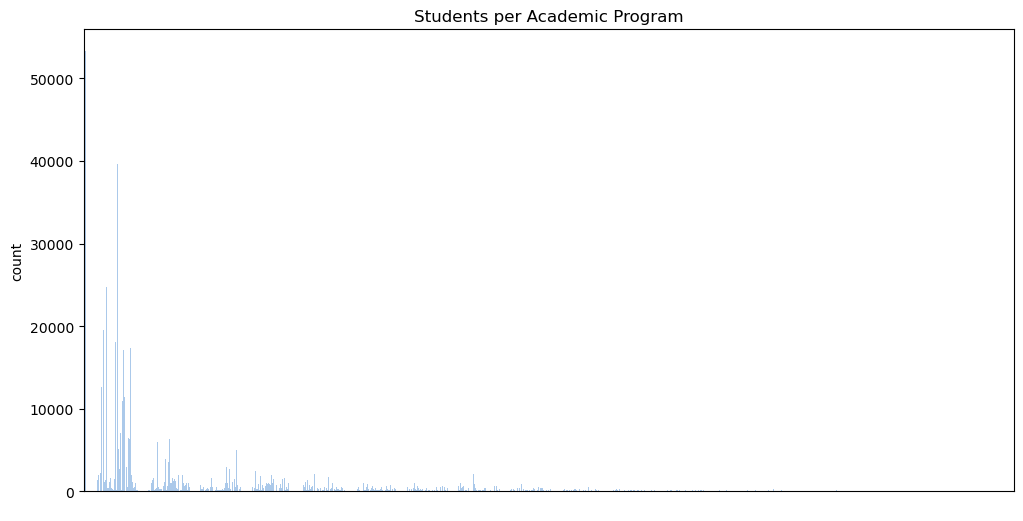

In [40]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x="ESTU_PRGM_ACADEMICO")
ax.set_title("Students per Academic Program")
ax.set_xlabel(" ")
ax.set_xticks([])
plt.show()

In [41]:
# Top-20 academical programs
df["ESTU_PRGM_ACADEMICO"].value_counts().sort_values(ascending=False)[:20]

ESTU_PRGM_ACADEMICO
DERECHO                                53244
ADMINISTRACION DE EMPRESAS             51902
CONTADURIA PUBLICA                     39664
PSICOLOGIA                             31932
INGENIERIA INDUSTRIAL                  28481
ADMINISTRACIÓN DE EMPRESAS             24777
INGENIERIA CIVIL                       19487
MEDICINA                               18099
PSICOLOGÍA                             17377
INGENIERIA DE SISTEMAS                 17150
TRABAJO SOCIAL                         12686
ENFERMERIA                             11635
ARQUITECTURA                           11469
ADMINISTRACIÓN EN SALUD OCUPACIONAL    11018
CONTADURÍA PÚBLICA                     10912
INGENIERIA AMBIENTAL                    9999
NEGOCIOS INTERNACIONALES                8858
LICENCIATURA EN PEDAGOGIA INFANTIL      8468
ECONOMIA                                7023
INGENIERIA MECANICA                     6928
Name: count, dtype: int64

In [42]:
# Percentage of students in the top-20 academic programs
(df["ESTU_PRGM_ACADEMICO"].value_counts(normalize=True) * 100)[:20]

ESTU_PRGM_ACADEMICO
DERECHO                                7.688664
ADMINISTRACION DE EMPRESAS             7.494874
CONTADURIA PUBLICA                     5.727653
PSICOLOGIA                             4.611119
INGENIERIA INDUSTRIAL                  4.112780
ADMINISTRACIÓN DE EMPRESAS             3.577906
INGENIERIA CIVIL                       2.814007
MEDICINA                               2.613574
PSICOLOGÍA                             2.509314
INGENIERIA DE SISTEMAS                 2.476534
TRABAJO SOCIAL                         1.831913
ENFERMERIA                             1.680144
ARQUITECTURA                           1.656173
ADMINISTRACIÓN EN SALUD OCUPACIONAL    1.591047
CONTADURÍA PÚBLICA                     1.575740
INGENIERIA AMBIENTAL                   1.443899
NEGOCIOS INTERNACIONALES               1.279134
LICENCIATURA EN PEDAGOGIA INFANTIL     1.222816
ECONOMIA                               1.014152
INGENIERIA MECANICA                    1.000433
Name: proportion, dt

## Analysis

### Questions for analysis

- Which status class had the best score in the test?
- How was the scores for each status class?
- What was the students' score on each period?
- What period had the most amount of high scores?
- Is having internet access important to get a good score in the test?

In [43]:
# Create an analysis dataset
df_analysis = df.copy()
# Extrating the year in the "periodo" column for easier analysis
df_analysis["PERIODO"] = df_analysis["PERIODO"].astype(str).apply(lambda x: x[:4])
df_analysis.dtypes

ID                                 int64
PERIODO                           object
ESTU_PRGM_ACADEMICO               object
ESTU_PRGM_DEPARTAMENTO            object
ESTU_VALORMATRICULAUNIVERSIDAD    object
ESTU_HORASSEMANATRABAJA           object
FAMI_ESTRATOVIVIENDA              object
FAMI_TIENEINTERNET                object
FAMI_EDUCACIONPADRE               object
FAMI_TIENELAVADORA                object
FAMI_TIENEAUTOMOVIL               object
ESTU_PRIVADO_LIBERTAD             object
ESTU_PAGOMATRICULAPROPIO          object
FAMI_TIENECOMPUTADOR              object
FAMI_TIENEINTERNET.1              object
FAMI_EDUCACIONMADRE               object
RENDIMIENTO_GLOBAL                object
dtype: object

In [44]:
# Create contingency tables
period_score_table = pd.crosstab(df_analysis.PERIODO, df_analysis.RENDIMIENTO_GLOBAL)
status_score_table = pd.crosstab(df_analysis.FAMI_ESTRATOVIVIENDA, df_analysis.RENDIMIENTO_GLOBAL)
internet_score_table = pd.crosstab(df_analysis.FAMI_TIENEINTERNET, df_analysis.RENDIMIENTO_GLOBAL)

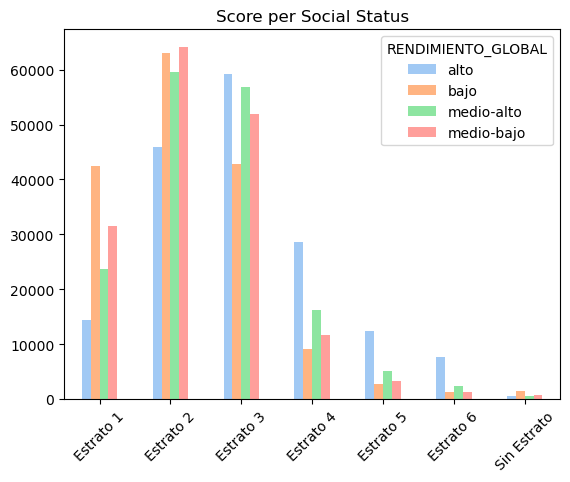

In [45]:
status_score_table.plot(kind="bar", title="Score per Social Status", xlabel="")
plt.xticks(rotation=45)
plt.show()

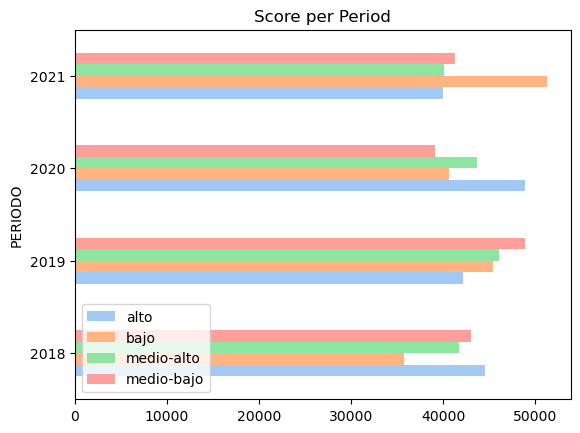

In [46]:
period_score_table.plot(kind="barh", title="Score per Period")
plt.legend(loc="lower left")
plt.show()

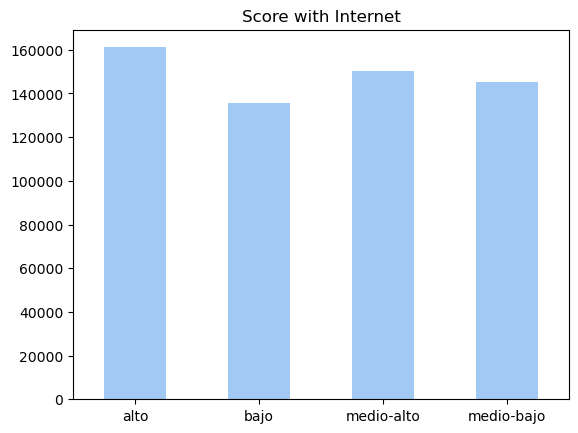

In [47]:
internet_score_table.loc["Si"].plot(kind="bar", title="Score with Internet", xlabel="")
plt.xticks(rotation=0)
plt.show()

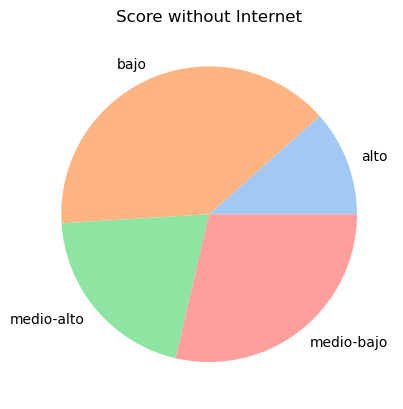

In [48]:
internet_score_table.loc["No"].plot(kind="pie", title="Score without Internet", ylabel="")
plt.show()

### Insights
- Most students have internet at home, which increases the odds of scoring "alto" in the test. On the other hand, it reduces high scores for those who do not have internet, althought there are some rare cases that did.
- High scores start dominating from the third to the sixth status class. This could be due to different factors like parents education, access to internet, etc.
- The period in which a student showed up to the test seems to relate well with the score. Maybe if it is analyzed with other variables it could give more useful information.